In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pwd

/home/sonic/SWIFT/example


# Gráficos

In [3]:
filename="k56*.txt"
foo = !find /home/sonic/SWIFT/example/mapas_de_cor -name $filename -type f
foo

['/home/sonic/SWIFT/example/mapas_de_cor/k56c3om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b4om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b1om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c3om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56d3M2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56d3om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c1om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b4om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56d4M.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b3om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c4om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c2M2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c1om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56d1om2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b2M2.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56c1M.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56d1om.txt',
 '/home/sonic/SWIFT/example/mapas_de_cor/k56b1om2.txt',
 '/ho

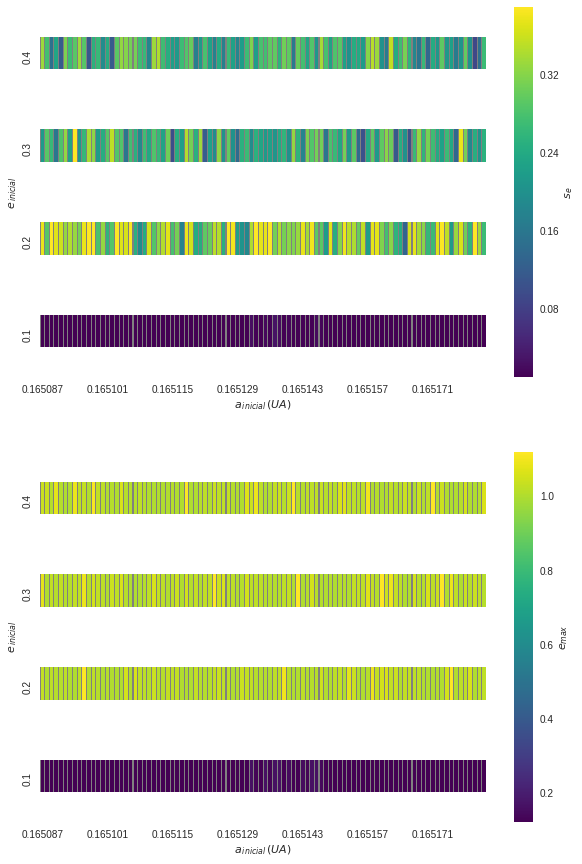

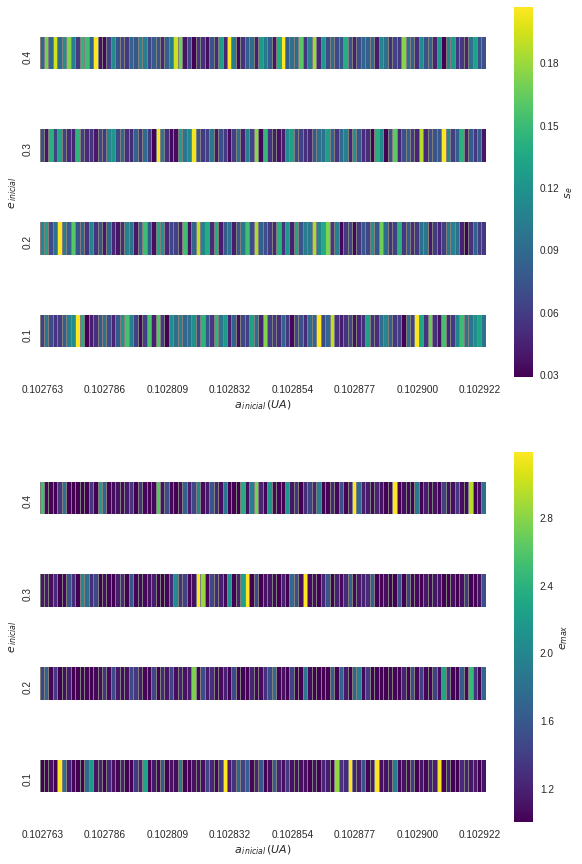

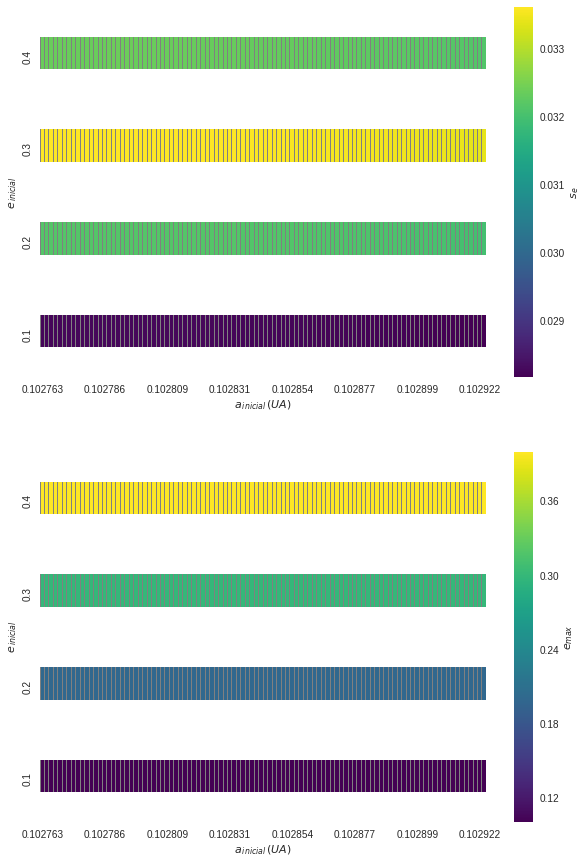

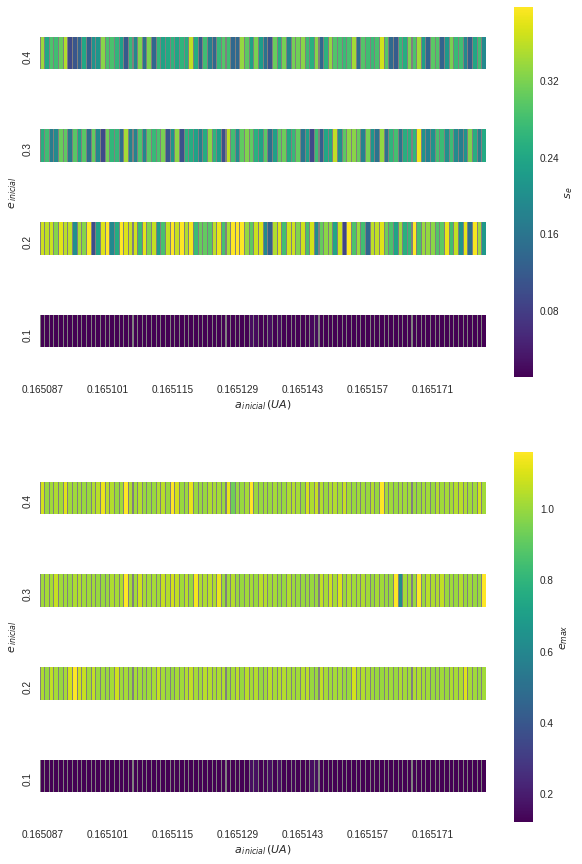

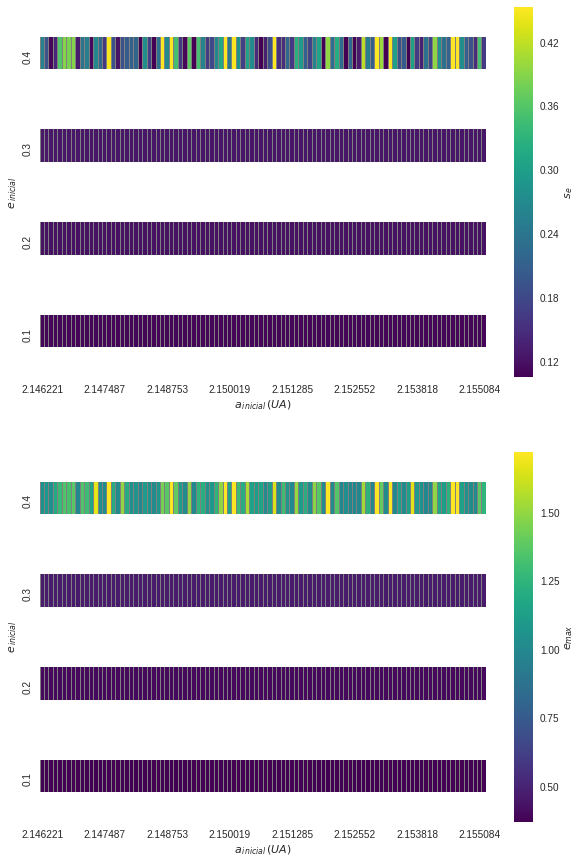

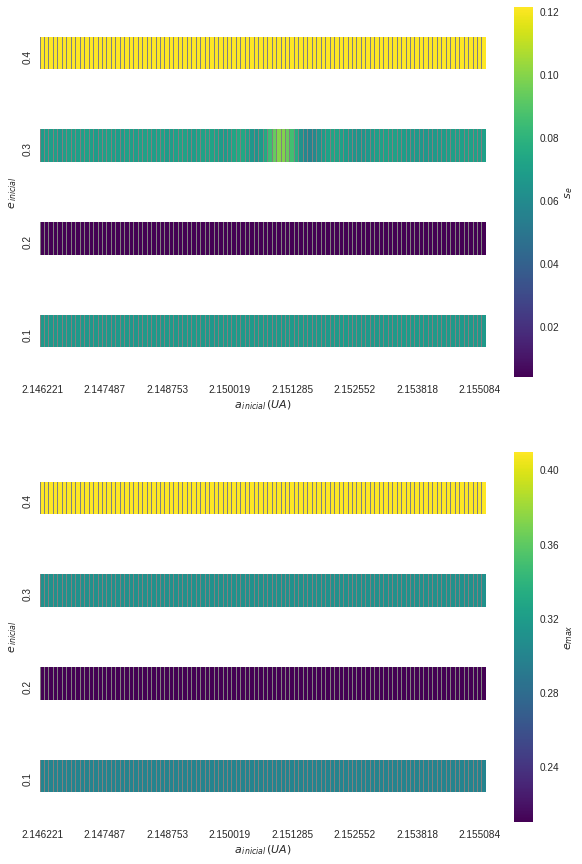

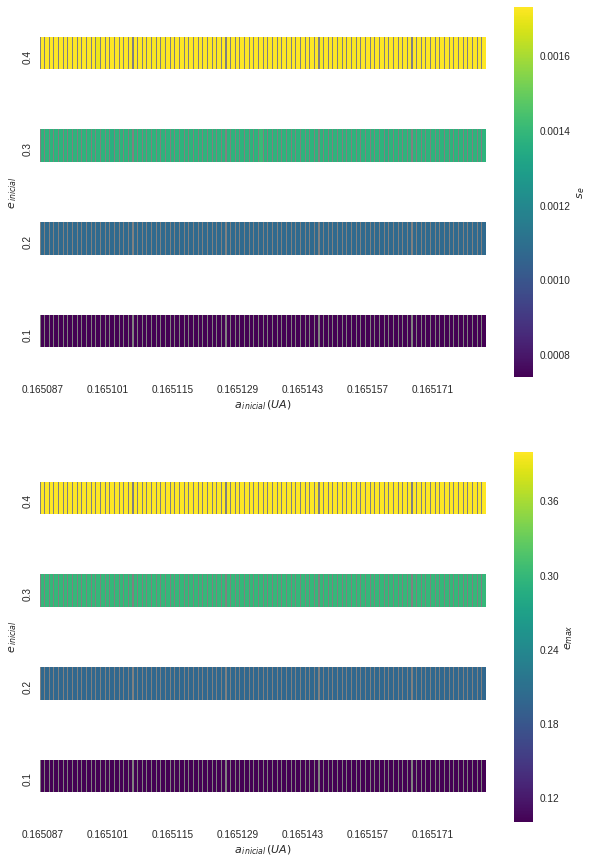

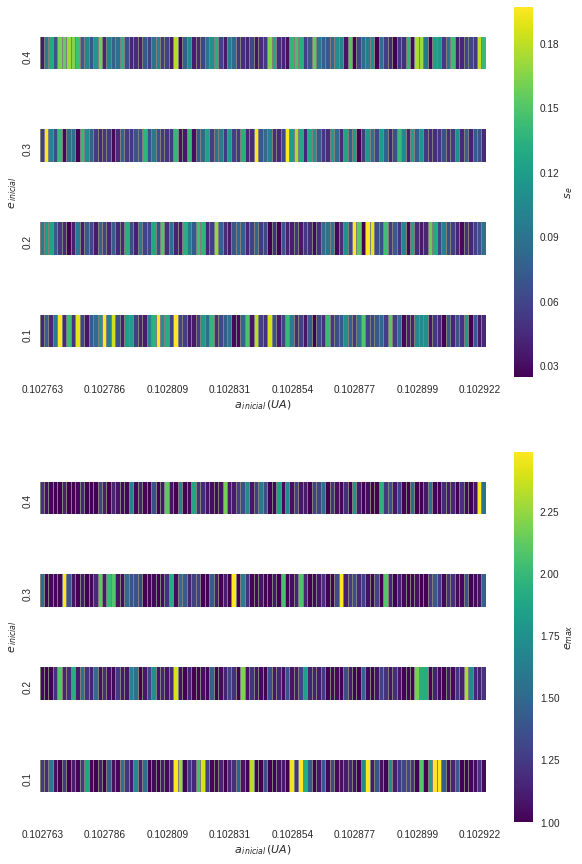

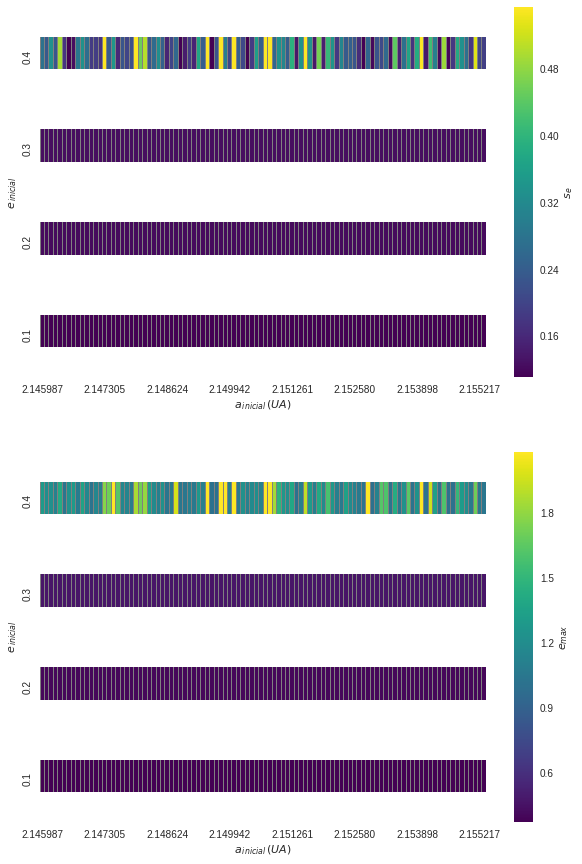

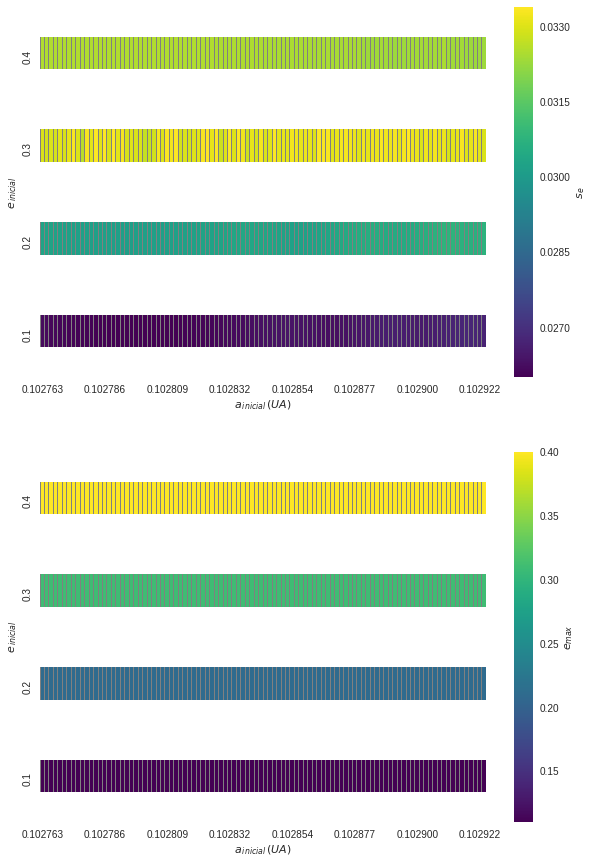

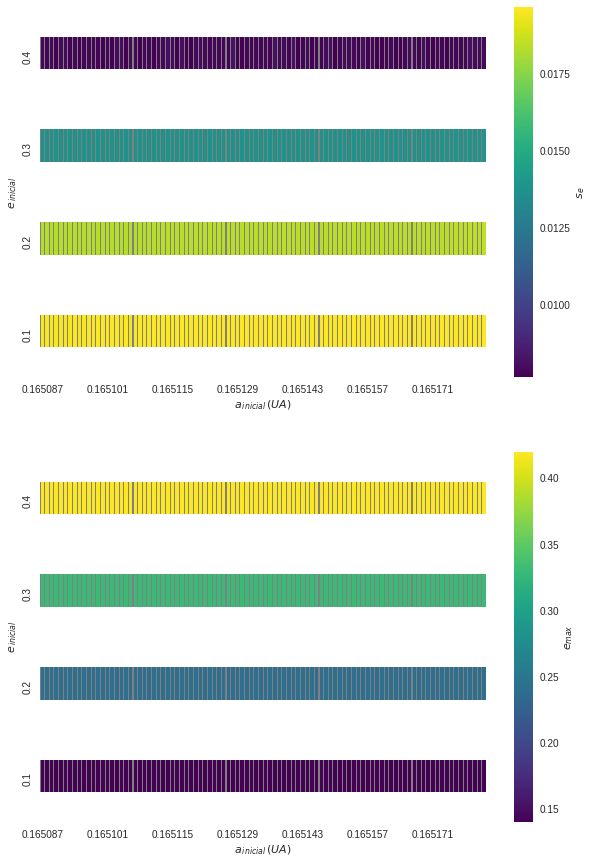

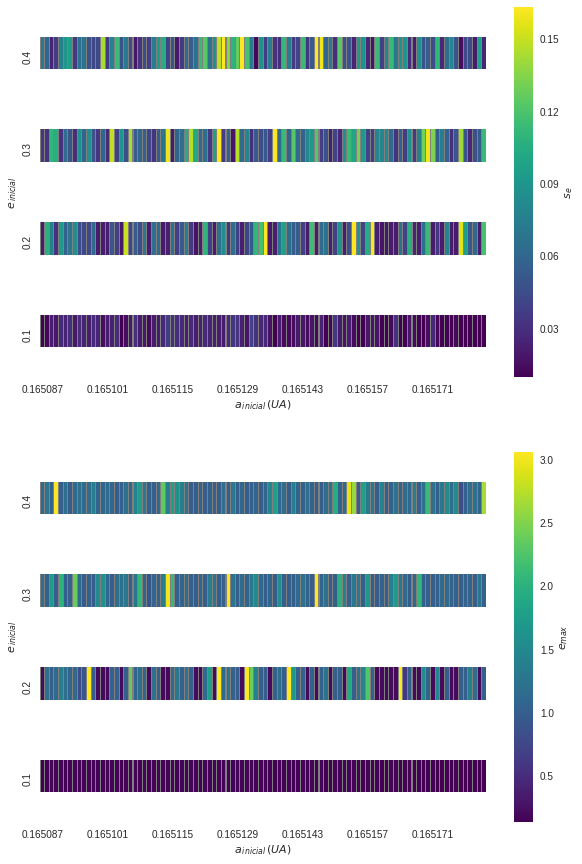

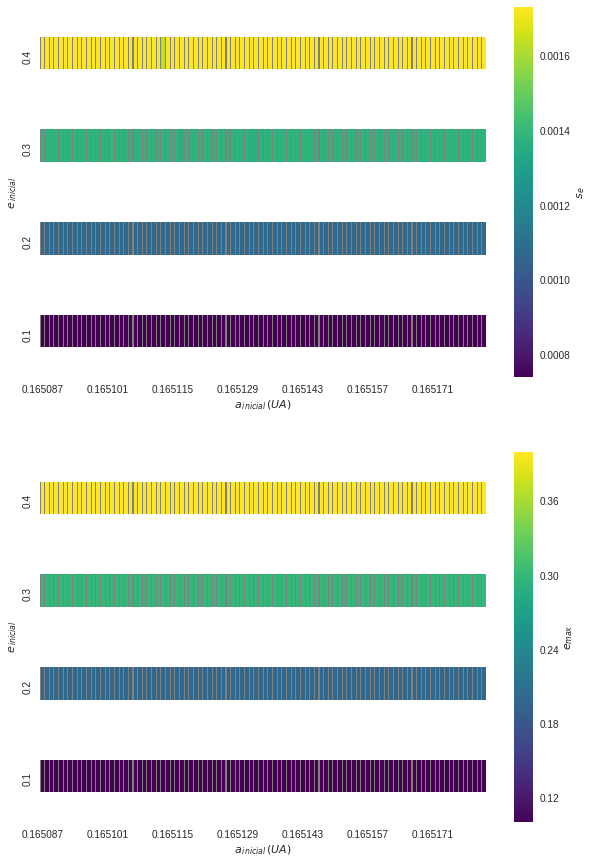

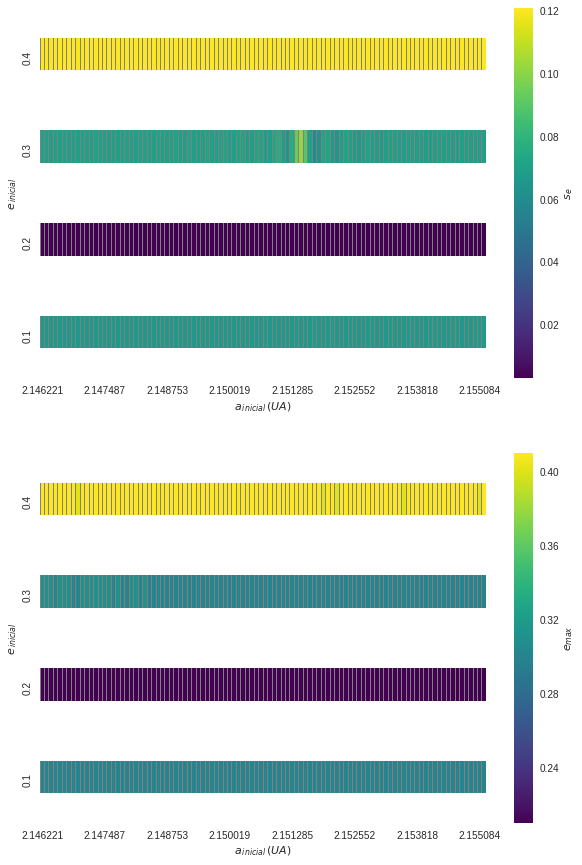

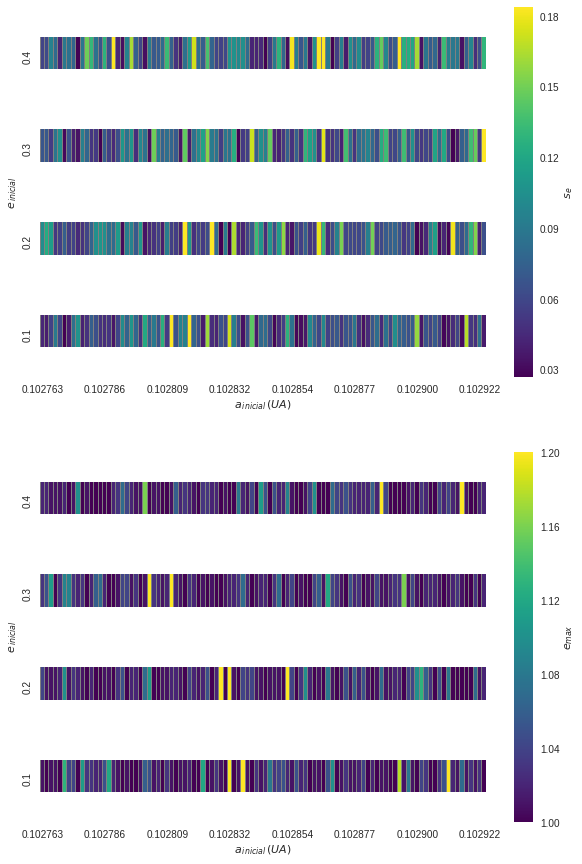

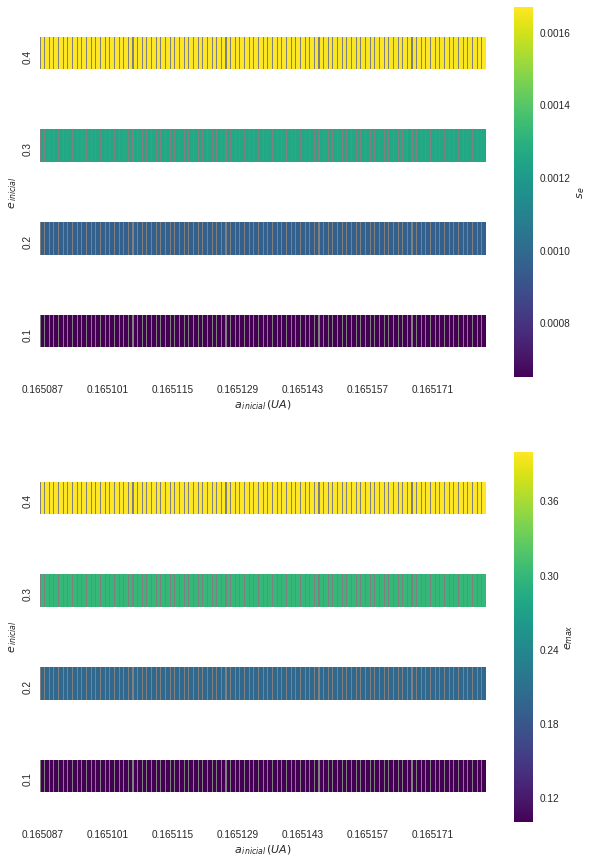

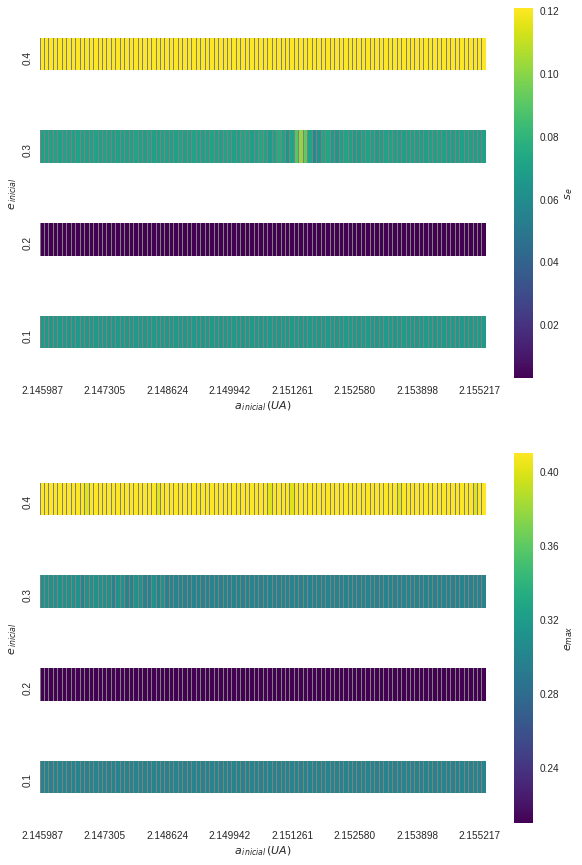

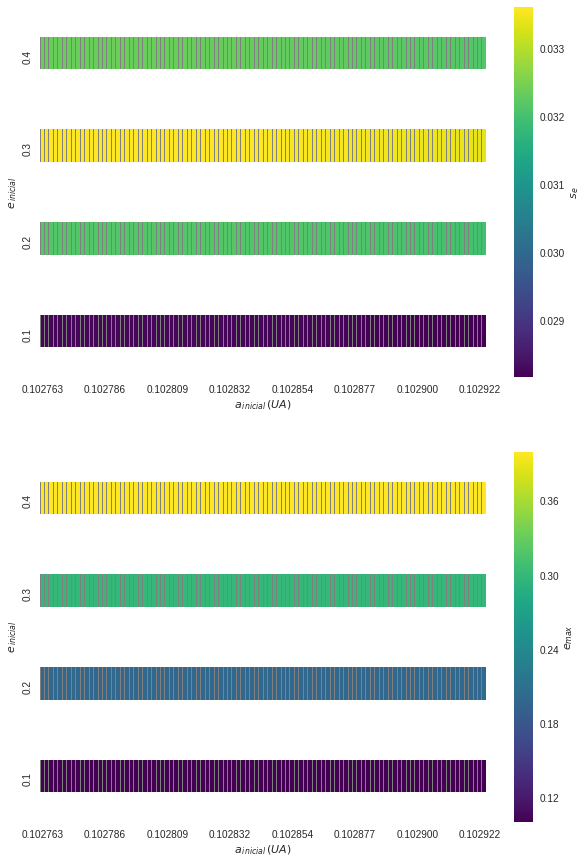

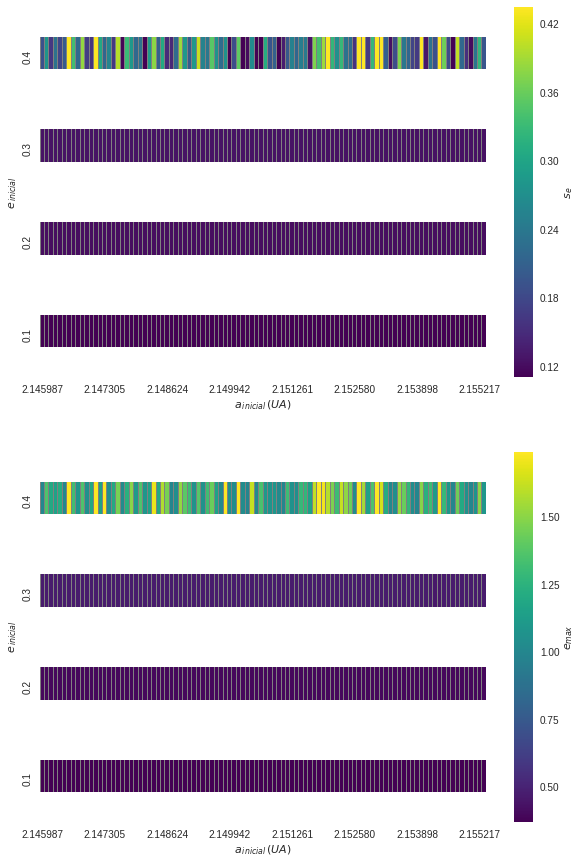

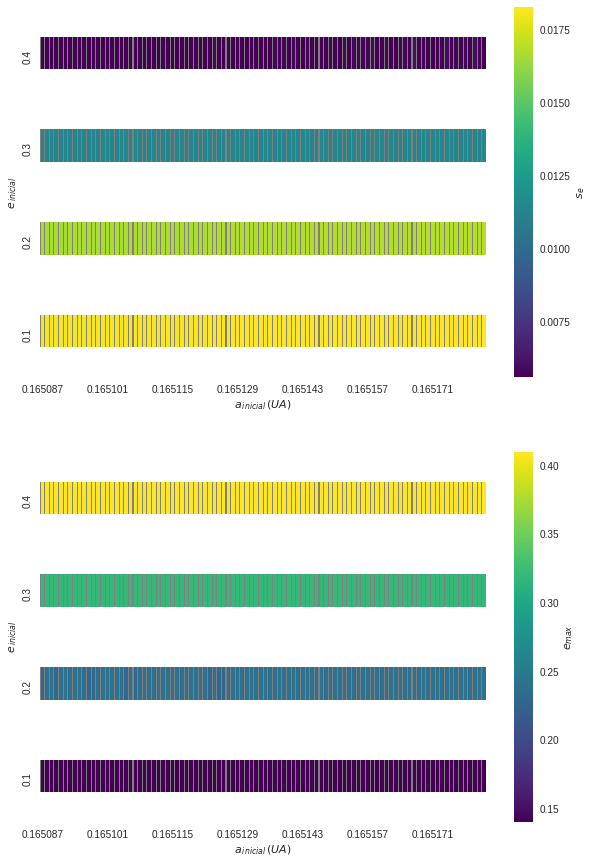

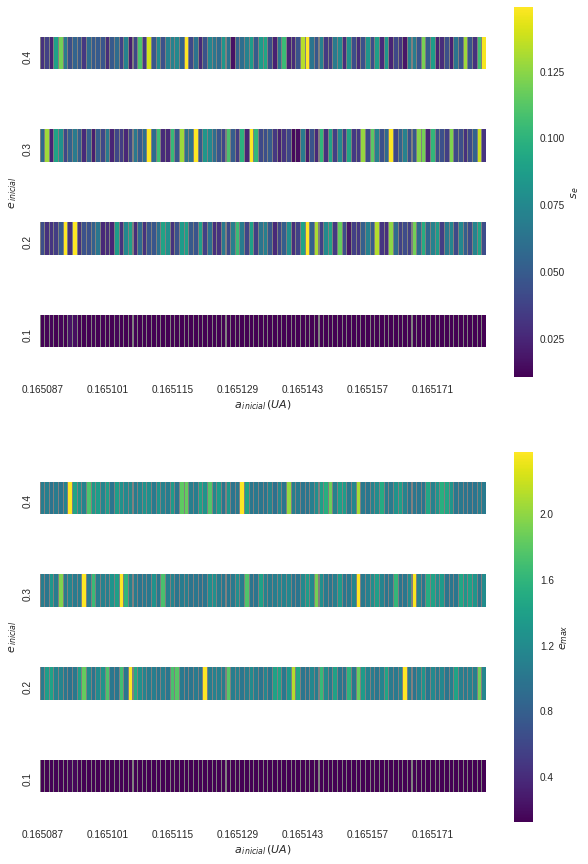

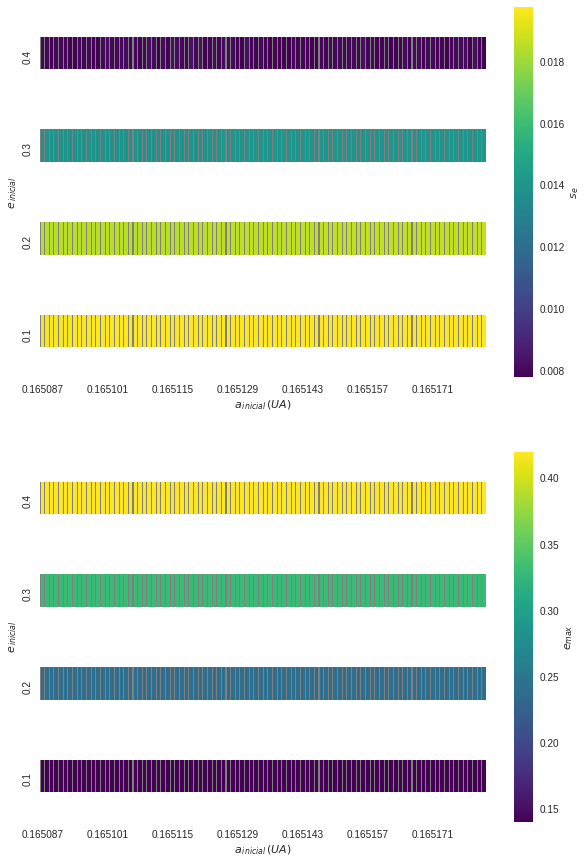

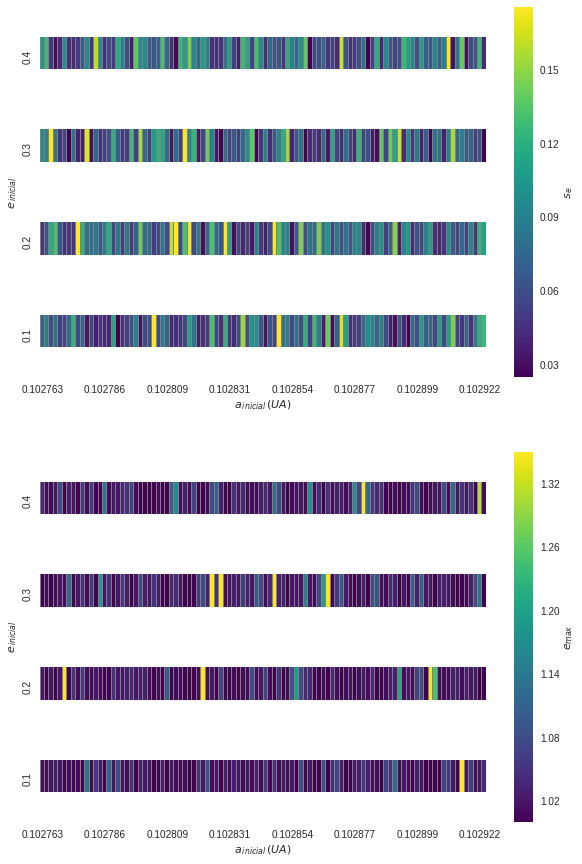

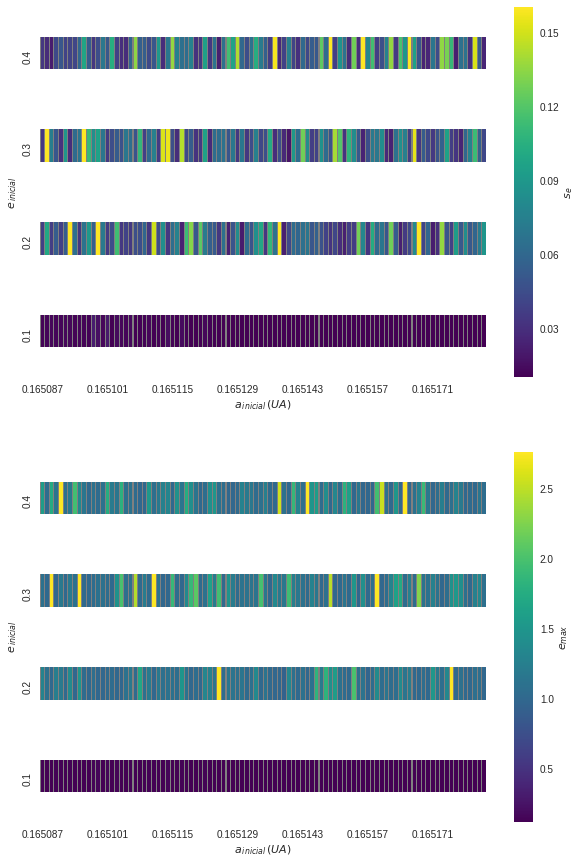

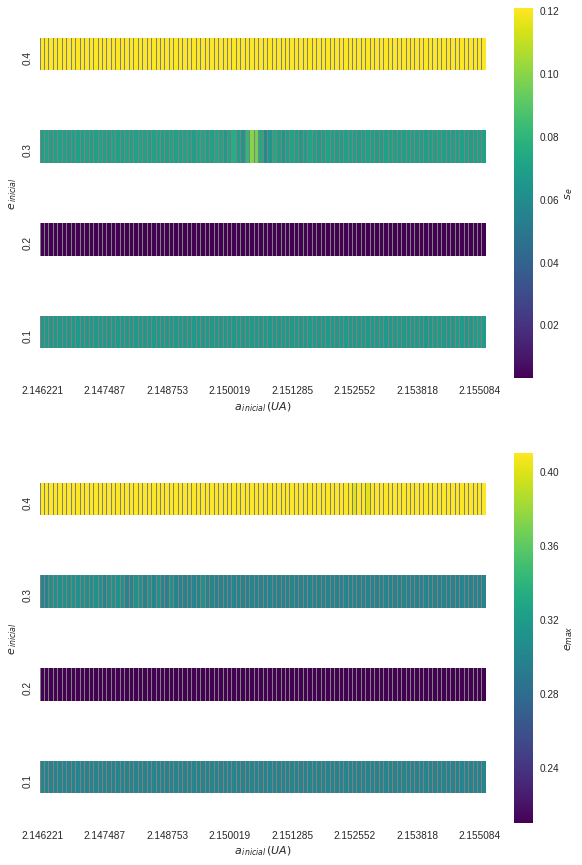

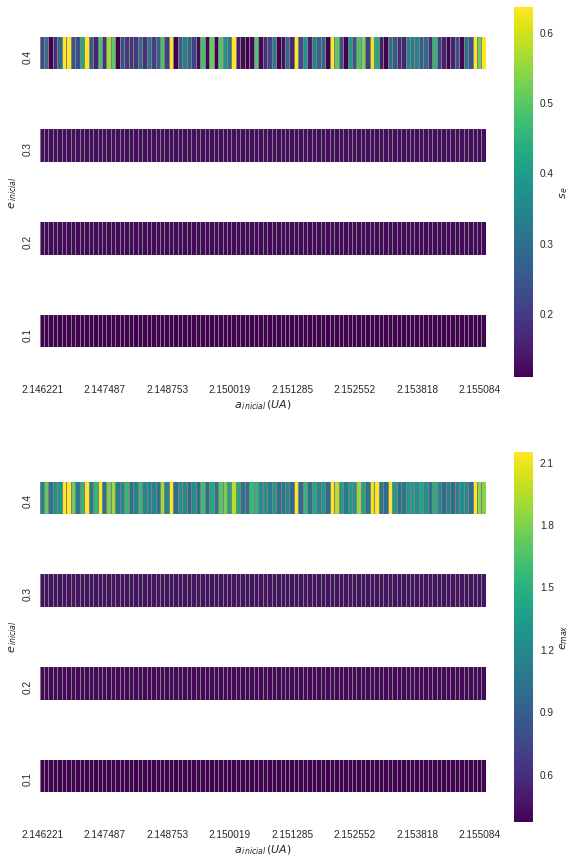

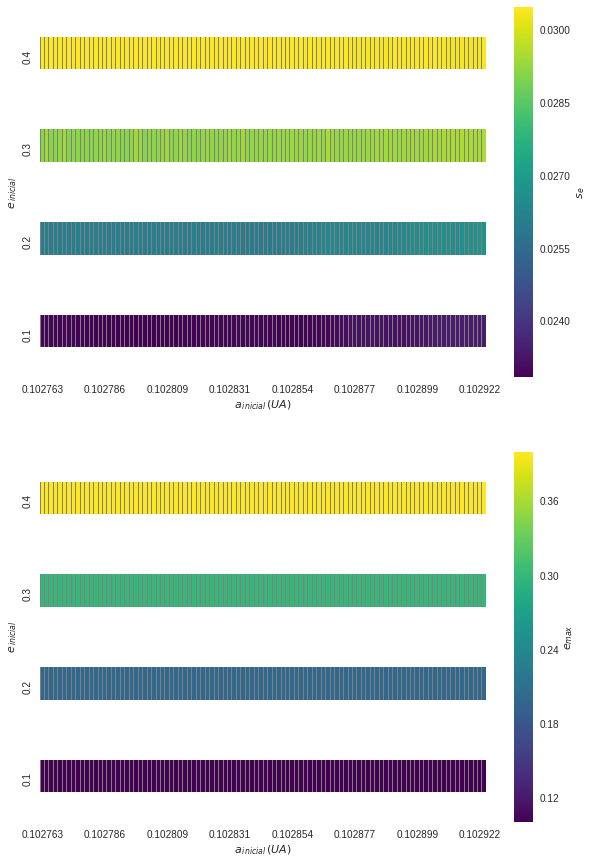

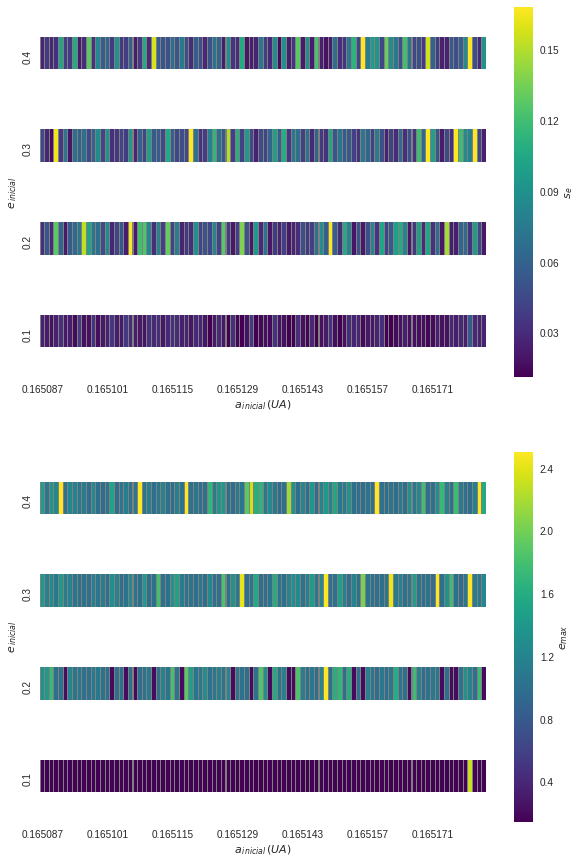

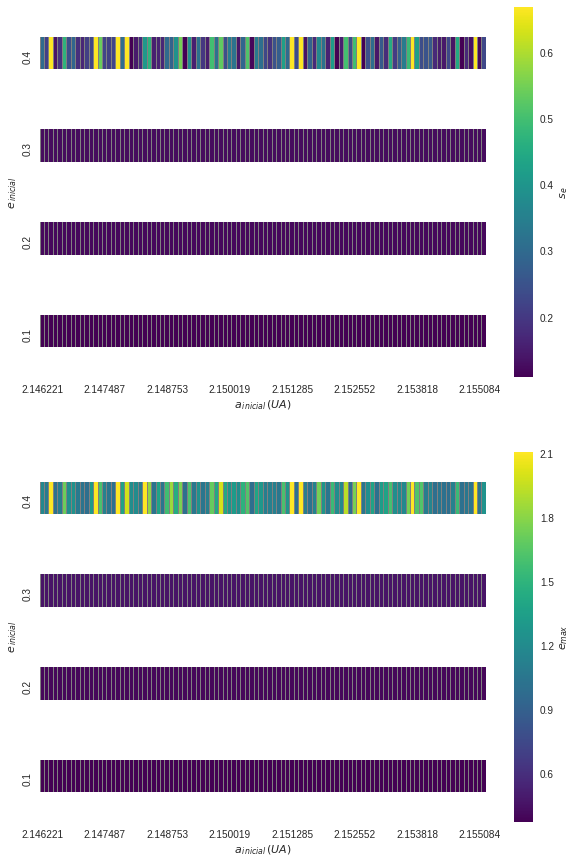

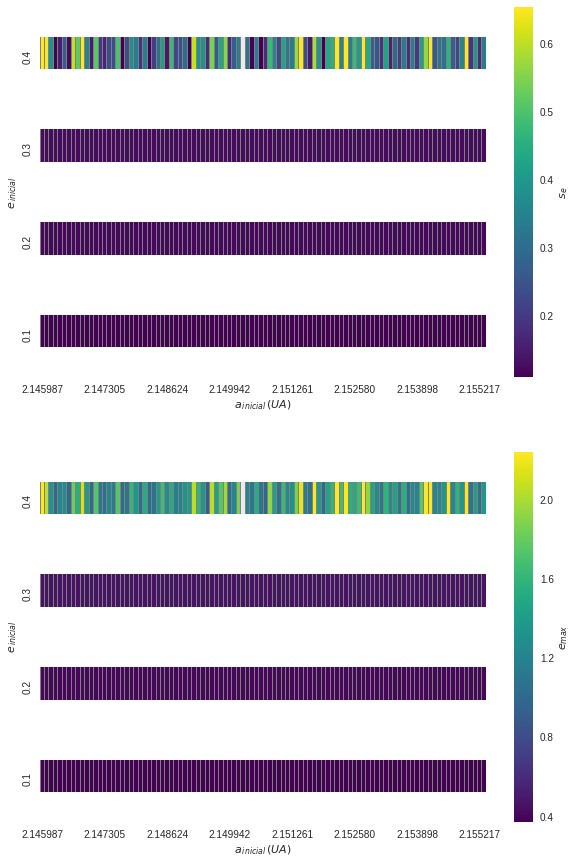

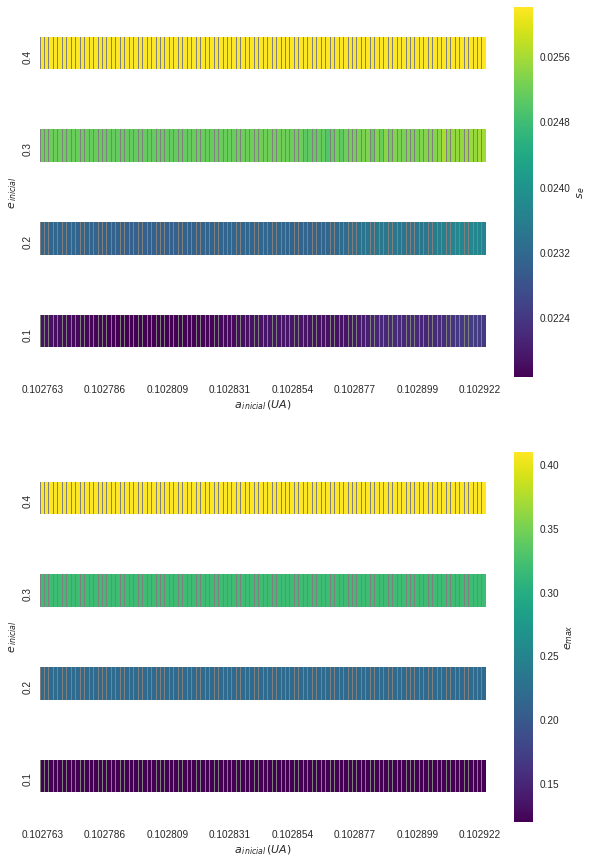

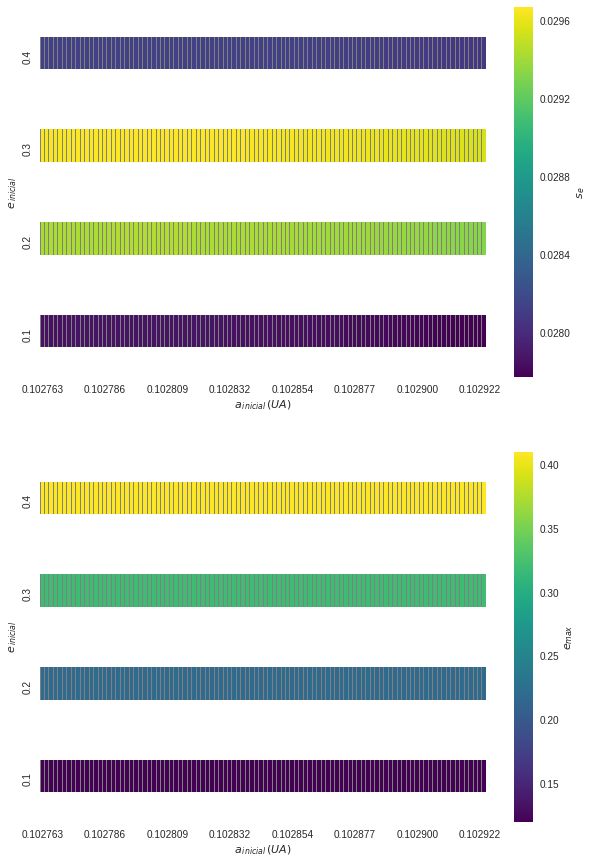

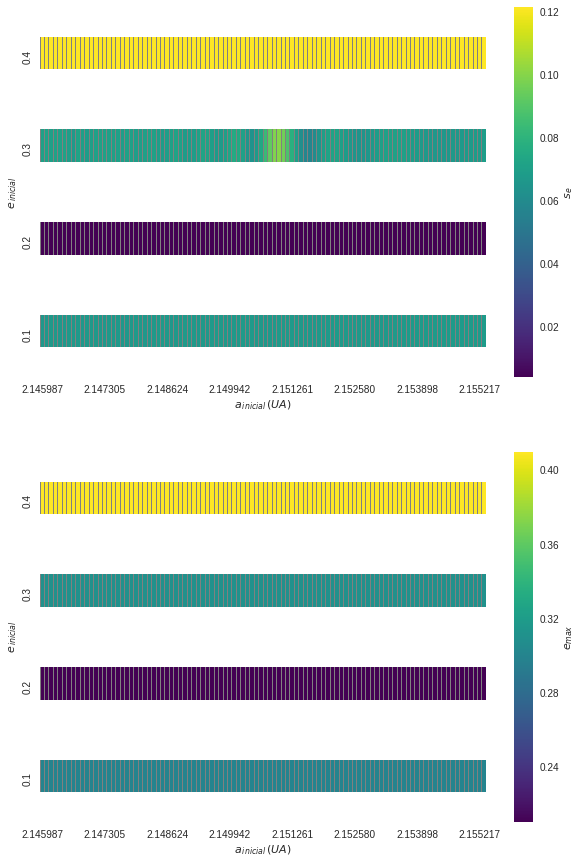

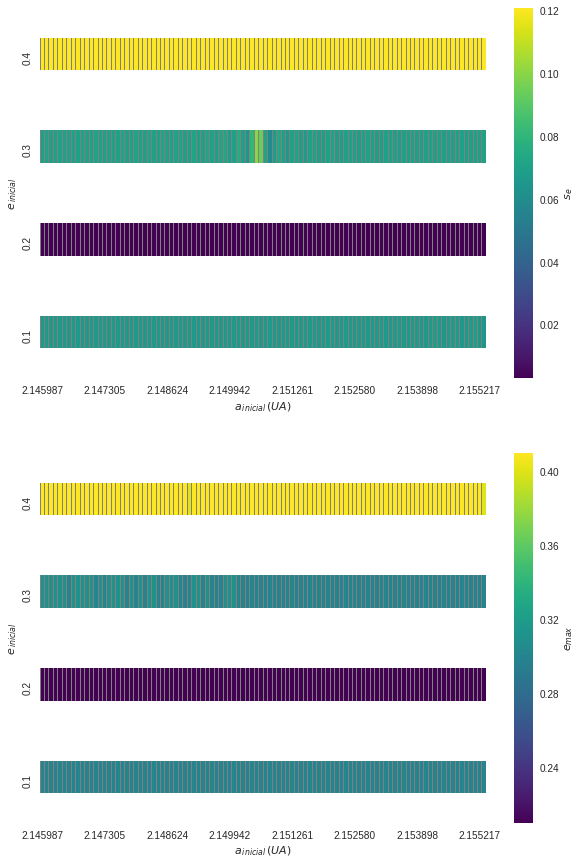

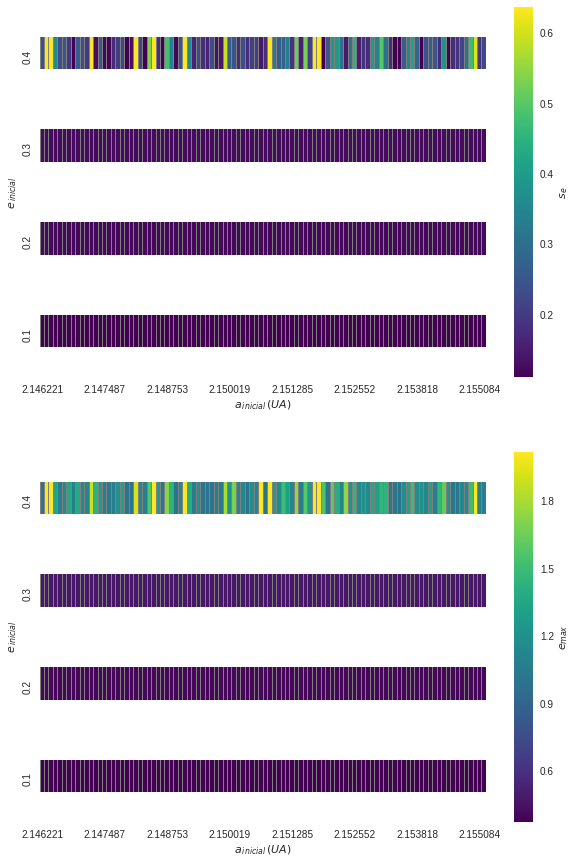

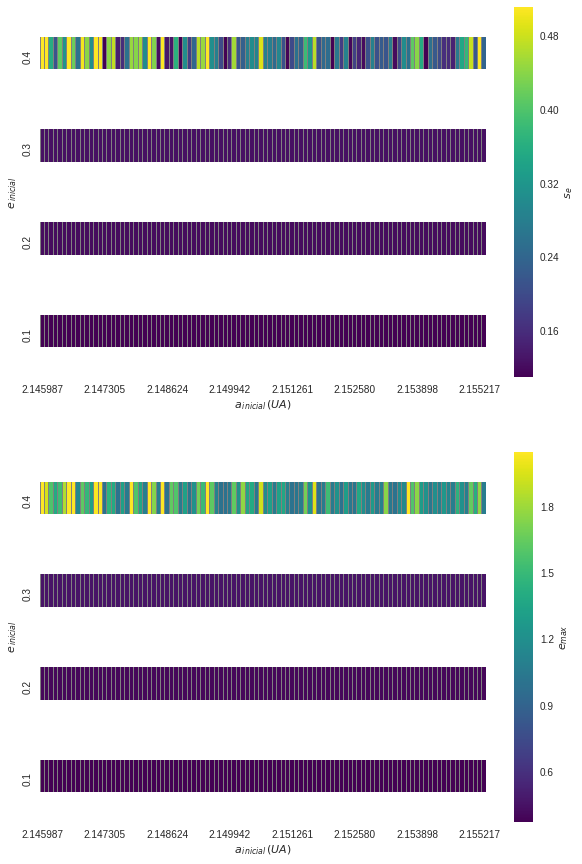

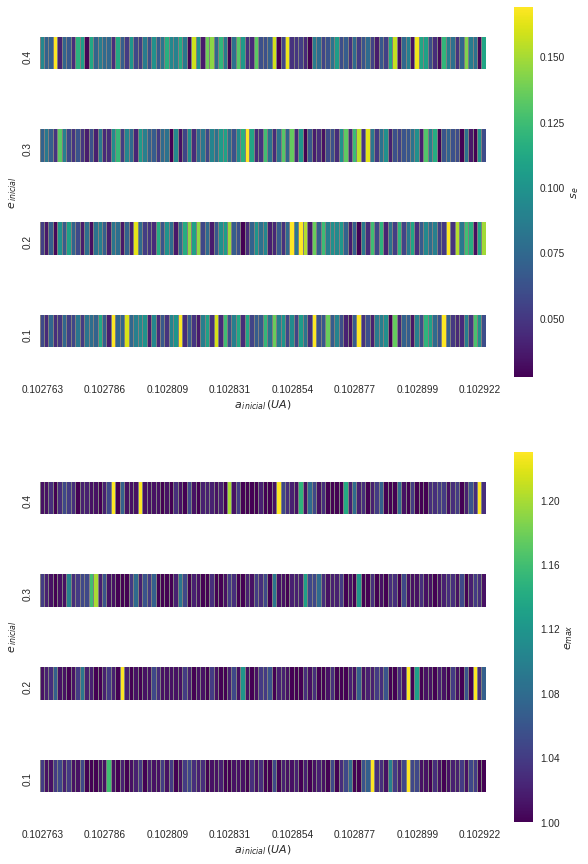

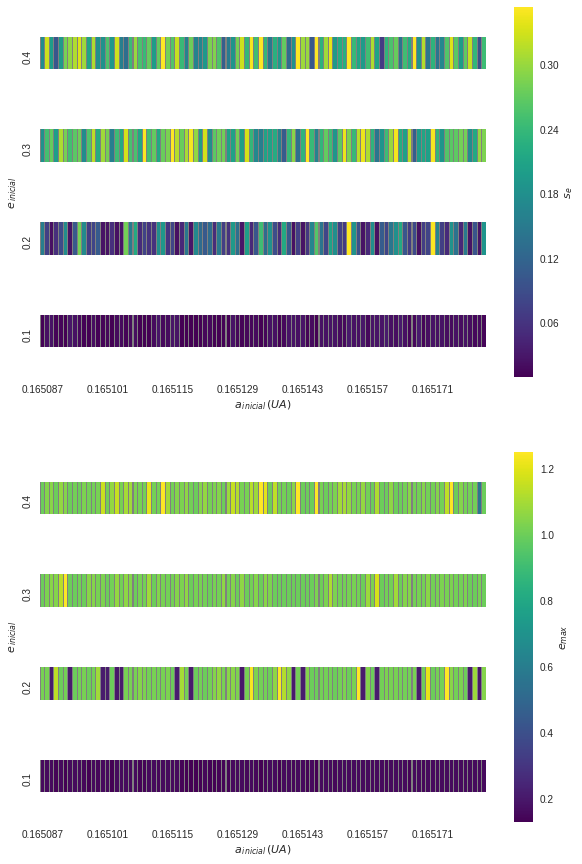

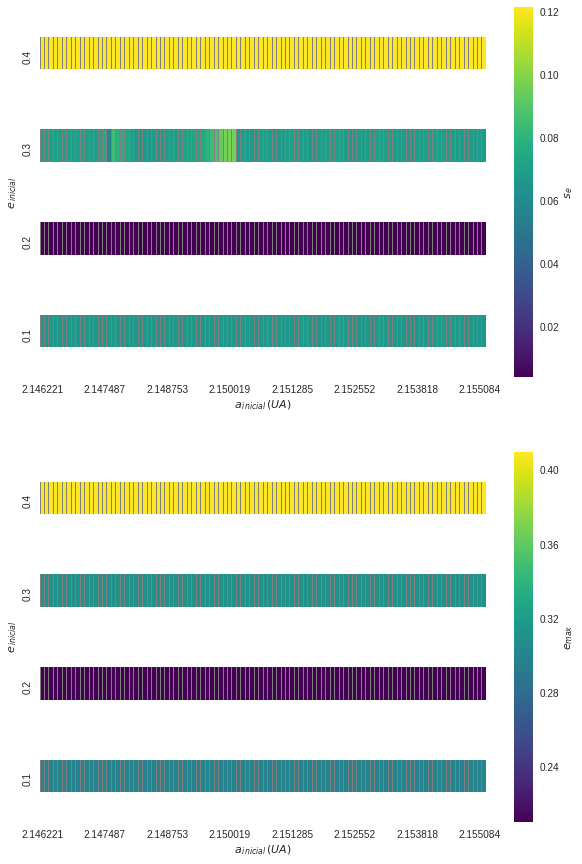

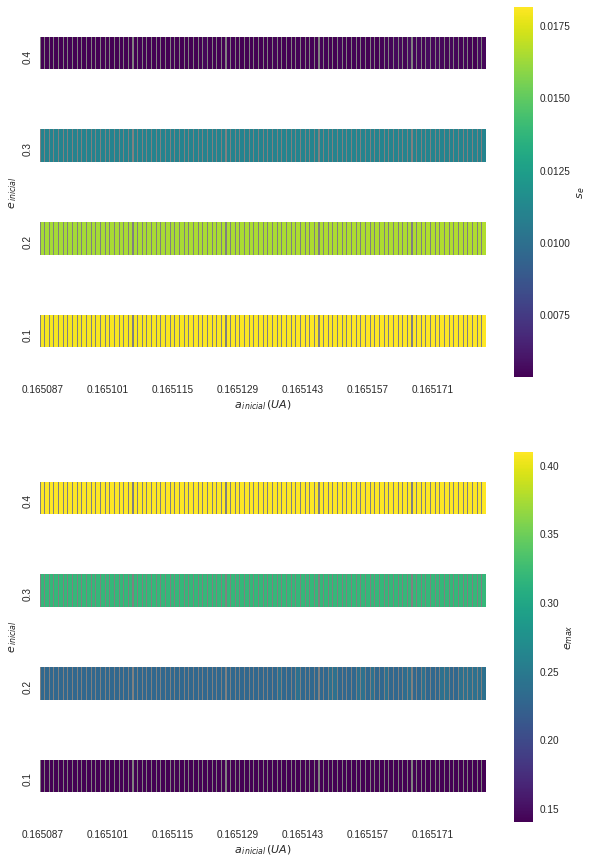

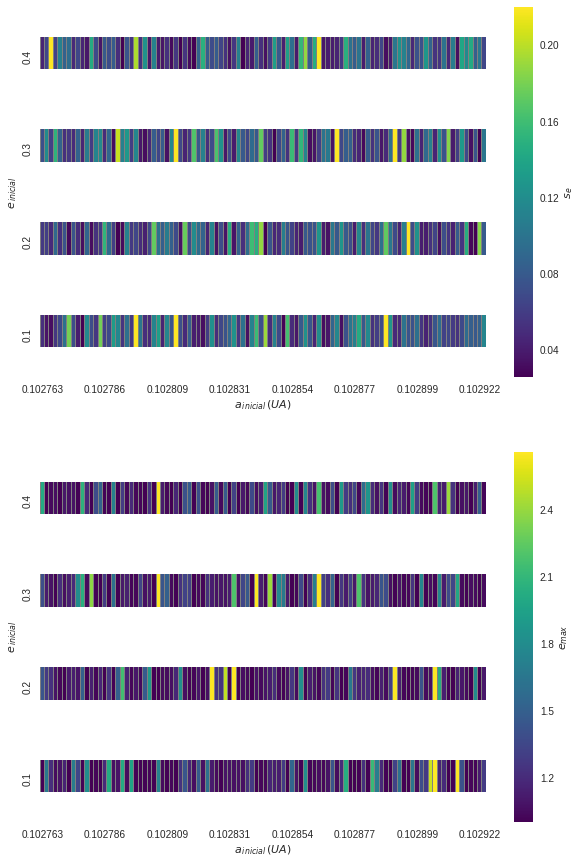

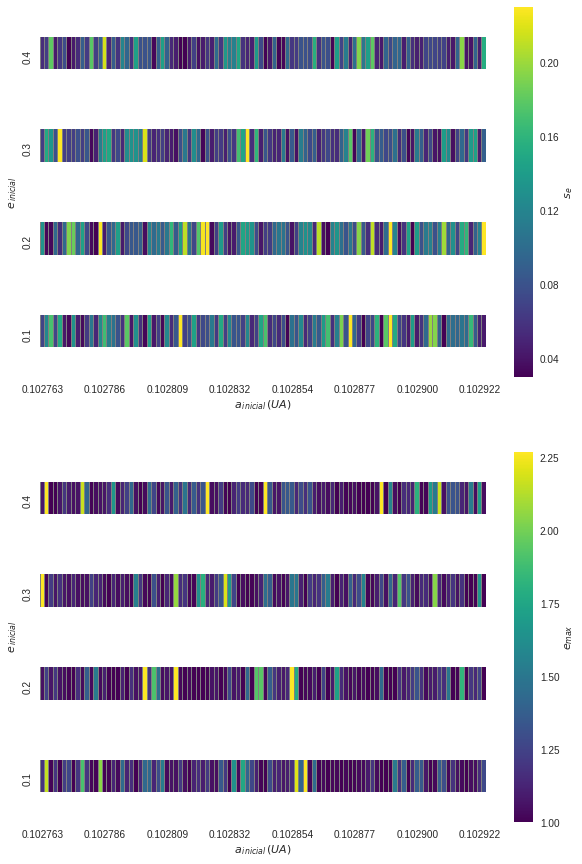

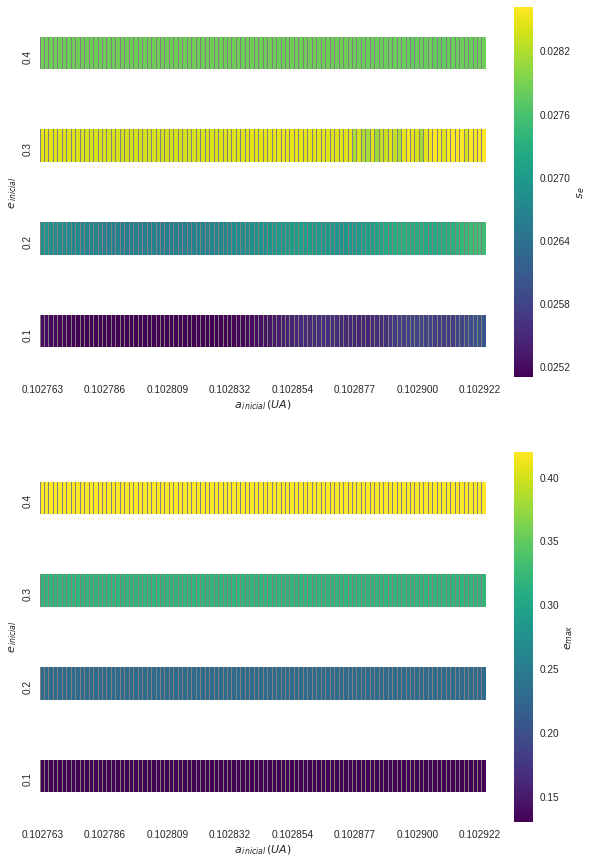

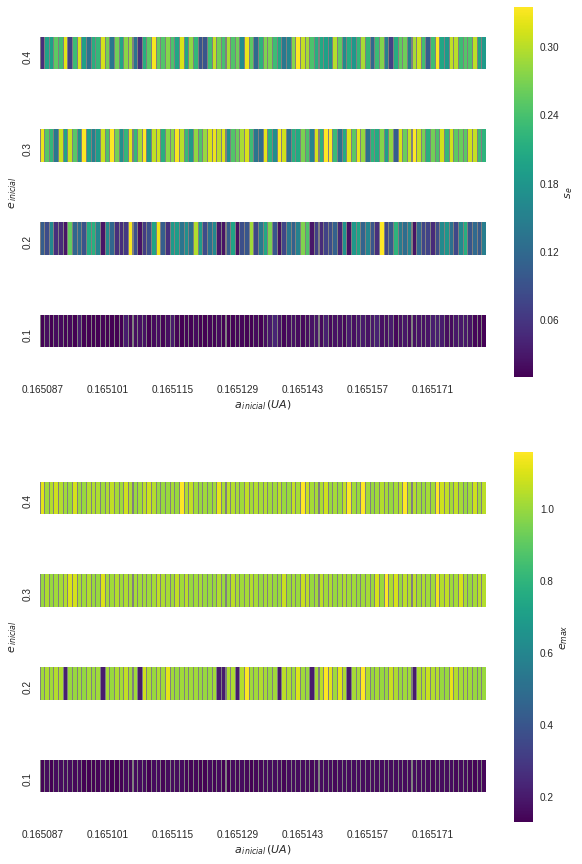

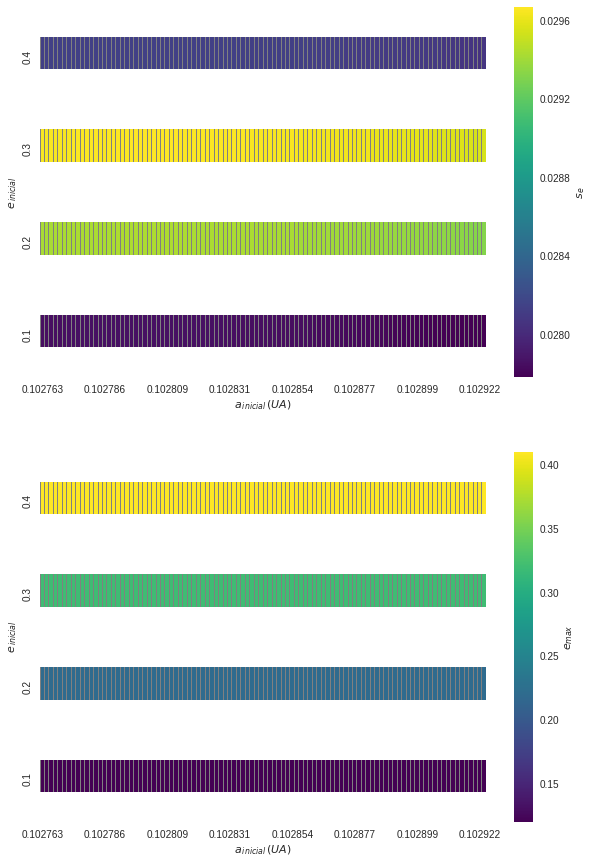

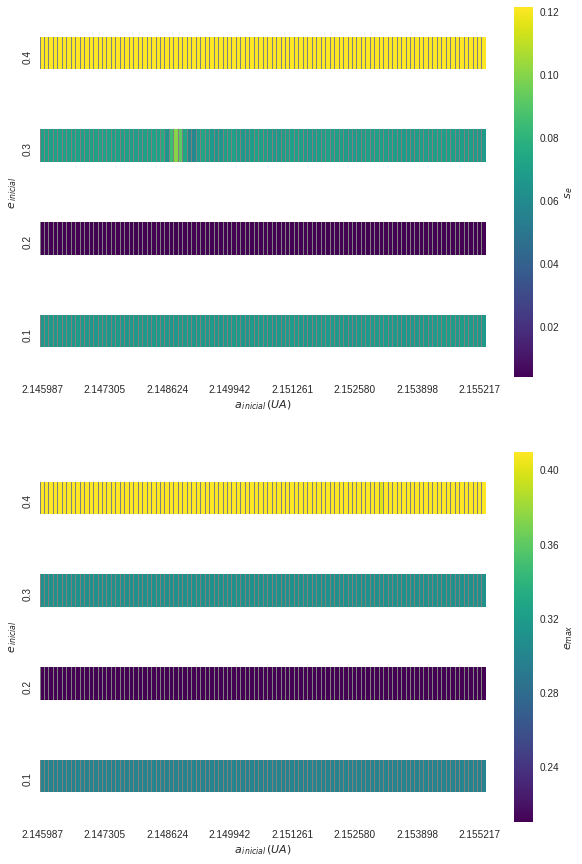

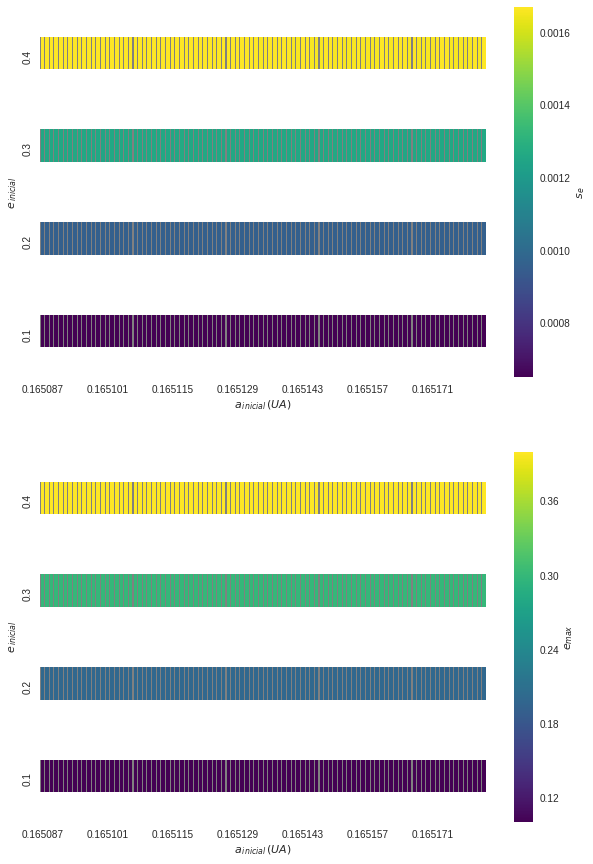

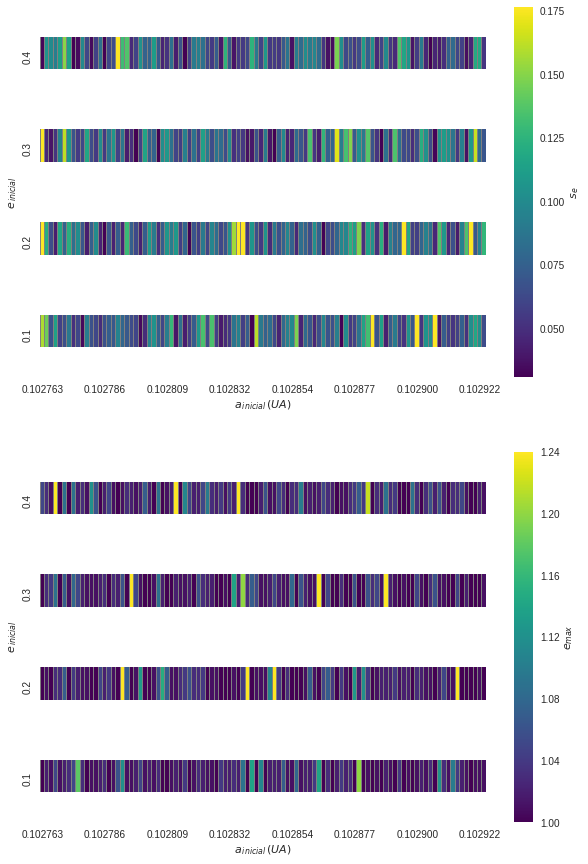

In [4]:
columns=['Semi-ini','Exc_ini','E_max','Desvio_e']
for h in range(len(foo)):
    a_ini=[]
    e_ini=[]
    t=[]
    e_max=[]
    d_a=[]
    d_e=[]
    a_ini_menor=[]
    bla = np.genfromtxt(foo[h],delimiter=',', dtype=str,skip_header=1,usecols = (7,8,9,11)).astype(str)
    bla = pd.DataFrame(bla)
    bla.columns = columns
    
    a_ini = np.array(bla['Semi-ini'])
    e_ini = bla['Exc_ini']
#     t = np.array(bla['Tempo_Final'])
    e_max = np.array(bla['E_max'])
#     d_a = np.array(bla['Desvio_a'])
    d_e = np.array(bla['Desvio_e'])
    
    a_ini = list(map(float,a_ini))
    e_ini = list(map(float,e_ini))
#     t = list(map(float,t))
    e_max = list(map(float,e_max))
#     d_a = list(map(float,d_a))
    d_e = list(map(float,d_e))
#     if list(foo[h].split('/')[-1])[0:3] == ['k', '9', 'd']:
#         for sla2 in range(len(a_ini)):
#             a_ini_menor.append(abs(np.log(a_ini[sla2])))
#         df = pd.DataFrame({'$log(a_{\,inicial})$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'desvio_e': d_e})
#         result = df.pivot_table(index='$e_{\,inicial}$', columns='$log(a_{\,inicial})$', values='desvio_e')

#         df2 = pd.DataFrame({'$log(a_{\,inicial})$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'desvio_a': d_a})
#         result2 = df2.pivot_table(index='$e_{\,inicial}$', columns='$log(a_{\,inicial})$', values='desvio_a')

#         df3 = pd.DataFrame({'$log(a_{\,inicial})$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'tempo': t})
#         result3 = df3.pivot_table(index='$e_{\,inicial}$', columns='$log(a_{\,inicial})$', values='tempo')

#         df4 = pd.DataFrame({'$log(a_{\,inicial})$': a_ini_menor, '$e_{\,inicial}$': e_ini, '$e_{max}$': e_max})
#         result4 = df4.pivot_table(index='$e_{\,inicial}$', columns='$log(a_{\,inicial})$', values='$e_{max}$')
    for sla in range(len(a_ini)):
        a_ini_menor.append("{:.6f}".format(a_ini[sla]))
    df = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'desvio_e': d_e})
    result = df.pivot_table(index='$e_{\,inicial}$', columns='$a_{\,inicial}\,(UA)$', values='desvio_e')

#     df2 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'desvio_a': d_a})
#     result2 = df2.pivot_table(index='$e_{\,inicial}$', columns='$a_{\,inicial}\,(UA)$', values='desvio_a')

#     df3 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}$': e_ini, 'tempo': t})
#     result3 = df3.pivot_table(index='$e_{\,inicial}$', columns='$a_{\,inicial}\,(UA)$', values='tempo')

    df4 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}$': e_ini, '$e_{max}$': e_max})
    result4 = df4.pivot_table(index='$e_{\,inicial}$', columns='$a_{\,inicial}\,(UA)$', values='$e_{max}$')
    
    plt.rcParams['figure.figsize']=(10.0,15.0)
    cmap='viridis'

    #plt.figure(figsize=(10,5))
    ax1 = plt.subplot(211)
    loco = sns.heatmap(result, fmt="g",xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$s_{\,e}$'})
    loco.invert_yaxis()
    l = plt.axhline(y=0,linewidth=60,color='white')
    l = plt.axhline(y=1,linewidth=60,color='white')
    l = plt.axhline(y=2,linewidth=60,color='white')
    l = plt.axhline(y=3,linewidth=60,color='white')
    l = plt.axhline(y=4,linewidth=60,color='white')

#     ax2 = plt.subplot(412,sharex=ax1)
#     loco2 = sns.heatmap(result2,xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$\sigma_{\,a}$'})
#     loco2.invert_yaxis()
#     l = plt.axhline(y=0,linewidth=40,color='white')
#     l = plt.axhline(y=1,linewidth=40,color='white')
#     l = plt.axhline(y=2,linewidth=40,color='white')
#     l = plt.axhline(y=3,linewidth=40,color='white')
#     l = plt.axhline(y=4,linewidth=40,color='white')

#     ax3 = plt.subplot(413,sharex=ax1)
#     loco3 = sns.heatmap(result3,xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': 'tempo'})
#     loco3.invert_yaxis()
#     l = plt.axhline(y=0,linewidth=40,color='white')
#     l = plt.axhline(y=1,linewidth=40,color='white')
#     l = plt.axhline(y=2,linewidth=40,color='white')
#     l = plt.axhline(y=3,linewidth=40,color='white')
#     l = plt.axhline(y=4,linewidth=40,color='white')

   # plt.figure(figsize=(10,5))
    ax4 = plt.subplot(212,sharex=ax1)
    loco4 = sns.heatmap(result4,xticklabels=14,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$e_{max}$'})
    loco4.invert_yaxis()
    l = plt.axhline(y=0,linewidth=60,color='white')
    l = plt.axhline(y=1,linewidth=60,color='white')
    l = plt.axhline(y=2,linewidth=60,color='white')
    l = plt.axhline(y=3,linewidth=60,color='white')
    l = plt.axhline(y=4,linewidth=60,color='white')
    plt.savefig('mapas_de_cor/'+foo[h].split('/')[-1].split('.')[0]+'.pdf')
    plt.show()

## Testes

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# bla = np.genfromtxt('mapas_de_cor/k9b1om.txt',delimiter=',', dtype=str,skip_header=1,usecols = (7,8,9,11)).astype(str)
# bla = pd.DataFrame(bla)
# bla.columns = ['Semi-ini','Exc_ini','E_max','Desvio_e']
# a_ini = np.array(bla['Semi-ini'])
# print('array strings',a_ini[0])
# e_ini = bla['Exc_ini']
# #t = np.array(bla['Tempo_Final'])
# e_max = np.array(bla['E_max'])
# #d_a = np.array(bla['Desvio_a'])
# d_e = np.array(bla['Desvio_e'])
# a_ini = list(map(float,a_ini))
# #print('list floats',a_ini[0])
# e_ini = list(map(float,e_ini))
# #t = list(map(float,t))
# e_max = list(map(float,e_max))
# #d_a = list(map(float,d_a))
# d_e = list(map(float,d_e))
# a_ini_menor=[]
# for sla in range(len(a_ini)):
#     a_ini_menor.append("{:.6f}".format(a_ini[sla]))
# bla

In [6]:
# plt.rcParams['figure.figsize']=(10.0,15.0)
# cmap='viridis'
# #import IPython
# df = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}\,(UA)$': e_ini, 'desvio_e': d_e})
# result = df.pivot_table(index='$e_{\,inicial}\,(UA)$', columns='$a_{\,inicial}\,(UA)$', values='desvio_e')
# print(df)
# print(result)
# #df2 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}\,(UA)$': e_ini, 'desvio_a': d_a})
# #result2 = df2.pivot_table(index='$e_{\,inicial}\,(UA)$', columns='$a_{\,inicial}\,(UA)$', values='desvio_a')

# #df3 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}\,(UA)$': e_ini, 'tempo': t})
# #result3 = df3.pivot_table(index='$e_{\,inicial}\,(UA)$', columns='$a_{\,inicial}\,(UA)$', values='tempo')

# df4 = pd.DataFrame({'$a_{\,inicial}\,(UA)$': a_ini_menor, '$e_{\,inicial}\,(UA)$': e_ini, '$e_{max}$': e_max})
# result4 = df4.pivot_table(index='$e_{\,inicial}\,(UA)$', columns='$a_{\,inicial}\,(UA)$', values='$e_{max}$')
# # f, axarr = plt.subplots(2, 1, figsize = (15,10),squeeze=False,  sharex = 'all', sharey = 'all')

# # sns.set(font_scale=1.3)
# ax1 = plt.subplot(211)
# loco = sns.heatmap(result, fmt="g",xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$\sigma_{\,e}$'})
# loco.invert_yaxis()
# l = plt.axhline(y=0,linewidth=60,color='white')
# l = plt.axhline(y=1,linewidth=60,color='white')
# l = plt.axhline(y=2,linewidth=60,color='white')
# l = plt.axhline(y=3,linewidth=60,color='white')
# l = plt.axhline(y=4,linewidth=60,color='white')
# # plt.setp(ax1.get_xticklabels(), visible=False)
# #plt.subplot(212)
# # sns.set(font_scale=1.3)
# # ax2 = plt.subplot(412,sharex=ax1)
# # loco2 = sns.heatmap(result2,xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$\sigma_{\,a}$'})
# # loco2.invert_yaxis()
# # l = plt.axhline(y=0,linewidth=40,color='white')
# # l = plt.axhline(y=1,linewidth=40,color='white')
# # l = plt.axhline(y=2,linewidth=40,color='white')
# # l = plt.axhline(y=3,linewidth=40,color='white')
# # l = plt.axhline(y=4,linewidth=40,color='white')
# # plt.setp(ax2.get_xticklabels(), visible=False)
# # sns.set(font_scale=1.3)
# # ax3 = plt.subplot(413,sharex=ax1)
# # loco3 = sns.heatmap(result3,xticklabels=False,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': 'tempo'})
# # loco3.invert_yaxis()
# # l = plt.axhline(y=0,linewidth=40,color='white')
# # l = plt.axhline(y=1,linewidth=40,color='white')
# # l = plt.axhline(y=2,linewidth=40,color='white')
# # l = plt.axhline(y=3,linewidth=40,color='white')
# # l = plt.axhline(y=4,linewidth=40,color='white')
# # plt.setp(ax3.get_xticklabels(), visible=False)
# # sns.set(font_scale=1.3)
# ax4 = plt.subplot(212,sharex=ax1)
# loco4 = sns.heatmap(result4,xticklabels=14,robust=True,cmap=cmap,linewidths=0.005,linecolor='gray',cbar_kws={'label': '$e_{max}$'})
# loco4.invert_yaxis()
# l = plt.axhline(y=0,linewidth=60,color='white')
# l = plt.axhline(y=1,linewidth=60,color='white')
# l = plt.axhline(y=2,linewidth=60,color='white')
# l = plt.axhline(y=3,linewidth=60,color='white')
# l = plt.axhline(y=4,linewidth=60,color='white')
# #plt.rcParams['figure.figsize']=(30.0,20.0)
# #fig = plt.gcf()
# #cmap = sns.diverging_palette(50, 330, sep=20,n=50, as_cmap=True)
# #plt.title('desvio')


# #plt.tight_layout()
# # plt.rc("font", size=100)

# plt.savefig('mapas_de_cor/k9b1om.pdf')
# plt.show()

In [7]:

# abs(np.log10(0.0000000000000005))

In [8]:
# q=!find mapas_de_cor/k9*.txt
# list(q[0].split('/')[-1])[0:3] == ['k', '9', 'd']

In [9]:
# list(q[0].split('/')[-1])[0:3] == ['k', '9', 'd']

In [10]:
# q[0].split('/')[-1] == 'k9d*.txt'

In [11]:
# q